<a href="https://colab.research.google.com/github/SruthyK-S/Deep_Learning/blob/main/dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install kaggle

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:27<00:00, 34.0MB/s]
100% 812M/812M [00:27<00:00, 30.7MB/s]


In [12]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [13]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [14]:
dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [15]:
import os

path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ',file_count)

Number of images:  25000


In [16]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.3503.jpg', 'dog.9280.jpg', 'dog.11626.jpg', 'dog.7039.jpg', 'dog.10158.jpg', 'dog.416.jpg', 'cat.1429.jpg', 'dog.3123.jpg', 'cat.6856.jpg', 'dog.9845.jpg', 'cat.6777.jpg', 'dog.1563.jpg', 'dog.4640.jpg', 'dog.10209.jpg', 'cat.1555.jpg', 'dog.4473.jpg', 'dog.12057.jpg', 'cat.3951.jpg', 'dog.250.jpg', 'dog.1009.jpg', 'dog.6710.jpg', 'dog.4883.jpg', 'dog.3558.jpg', 'cat.8096.jpg', 'dog.11208.jpg', 'cat.174.jpg', 'cat.12258.jpg', 'cat.3408.jpg', 'cat.5334.jpg', 'cat.4472.jpg', 'cat.621.jpg', 'cat.3360.jpg', 'cat.5677.jpg', 'dog.7763.jpg', 'dog.340.jpg', 'cat.10742.jpg', 'cat.8717.jpg', 'dog.310.jpg', 'dog.4044.jpg', 'cat.9249.jpg', 'cat.2095.jpg', 'cat.1296.jpg', 'cat.5755.jpg', 'dog.2092.jpg', 'dog.9164.jpg', 'cat.3928.jpg', 'cat.2839.jpg', 'dog.7485.jpg', 'dog.8387.jpg', 'dog.11493.jpg', 'cat.9454.jpg', 'cat.1612.jpg', 'dog.11547.jpg', 'dog.10920.jpg', 'cat.693.jpg', 'dog.285.jpg', 'cat.4976.jpg', 'dog.1468.jpg', 'dog.11794.jpg', 'cat.5856.jpg', 'dog.11450.jpg', 'dog.6188.jpg', 'ca

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


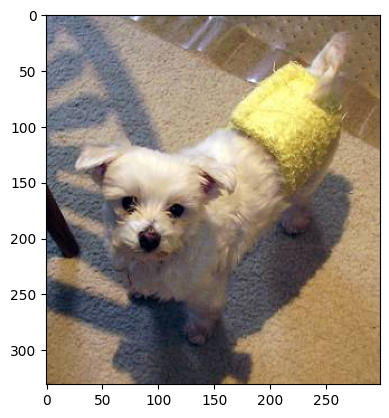

In [18]:
img = mpimg.imread('/content/train/dog.9280.jpg')
imgplt = plt.imshow(img)
plt.show()

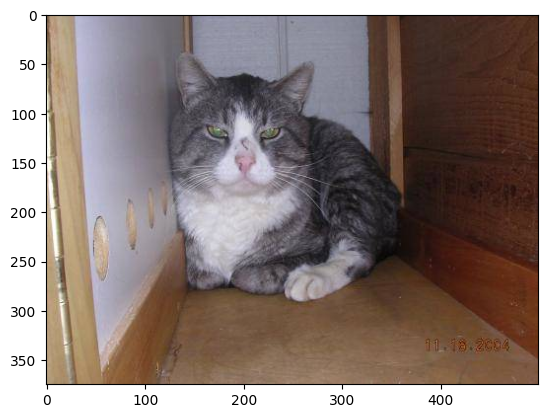

In [19]:
img = mpimg.imread('/content/train/cat.9634.jpg')
imgplt = plt.imshow(img)
plt.show()

In [20]:
for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
dog
dog
dog
dog


In [21]:
dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [22]:
os.mkdir('/content/image resized')

In [23]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

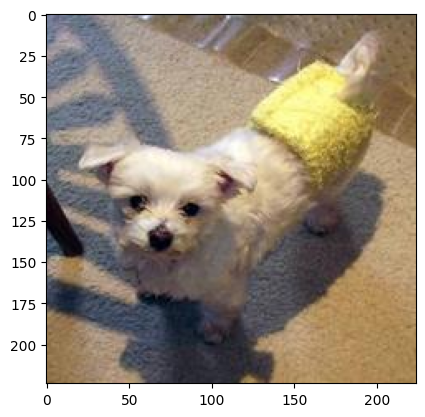

In [24]:
img = mpimg.imread('/content/image resized/dog.9280.jpg')
imgplt = plt.imshow(img)
plt.show()

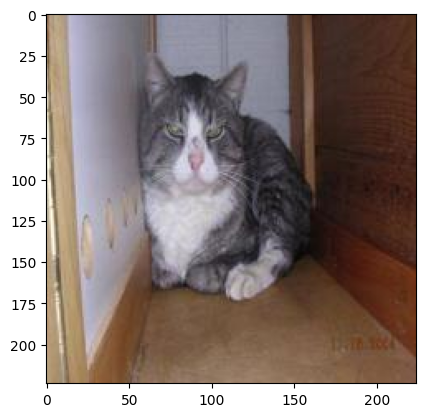

In [25]:
img = mpimg.imread('/content/image resized/cat.9634.jpg')
imgplt = plt.imshow(img)
plt.show()

In [26]:
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [27]:
print(filenames[0:5])
print(len(filenames))

['cat.3503.jpg', 'dog.9280.jpg', 'dog.11626.jpg', 'dog.7039.jpg', 'dog.10158.jpg']
2000


In [28]:
print(labels[0:5])
print(len(labels))

[0, 1, 1, 1, 1]
2000


In [29]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 987 1013]


In [30]:
import cv2
import glob

In [31]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [32]:
print(dog_cat_images)

[[[[138 129 120]
   [135 126 117]
   [146 139 130]
   ...
   [128 101  87]
   [132 106  90]
   [137 111  95]]

  [[154 145 136]
   [150 141 132]
   [157 150 141]
   ...
   [135 112  96]
   [137 112  96]
   [135 112  96]]

  [[164 155 146]
   [158 149 140]
   [163 154 145]
   ...
   [141 125 108]
   [139 121 104]
   [131 116  97]]

  ...

  [[ 97 127 138]
   [ 97 127 138]
   [ 98 128 139]
   ...
   [143 170 221]
   [143 169 223]
   [142 168 222]]

  [[ 94 124 135]
   [ 95 125 136]
   [ 98 128 139]
   ...
   [145 172 223]
   [144 171 222]
   [144 171 222]]

  [[ 92 122 133]
   [ 95 125 136]
   [ 98 128 139]
   ...
   [146 173 224]
   [145 172 223]
   [145 172 223]]]


 [[[163 135 128]
   [145 117 110]
   [145 116 111]
   ...
   [ 77 101 119]
   [ 84 108 126]
   [ 88 112 130]]

  [[165 137 130]
   [151 123 116]
   [155 126 121]
   ...
   [ 77 101 119]
   [ 81 105 123]
   [ 84 108 126]]

  [[169 142 132]
   [157 130 120]
   [159 131 124]
   ...
   [ 76 102 119]
   [ 78 104 121]
   [ 79 105

In [33]:
type(dog_cat_images)

numpy.ndarray

In [34]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [35]:
X = dog_cat_images
Y = np.asarray(labels)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [38]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [39]:
print(X_train_scaled)

[[[[0.29019608 0.41176471 0.50196078]
   [0.28627451 0.40784314 0.49803922]
   [0.28627451 0.40784314 0.49803922]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29019608 0.41176471 0.50196078]
   [0.29019608 0.41176471 0.50196078]
   [0.29019608 0.41176471 0.50196078]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.29019608 0.41568627 0.50588235]
   [0.29019608 0.41568627 0.50588235]
   [0.29019608 0.41568627 0.50588235]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.28235294 0.35686275 0.41568627]
   [0.32941176 0.41176471 0.47058824]
   [0.35686275 0.43529412 0.50196078]
   ...
   [0.96078431 0.85882353 0.80392157]
   [0.99607843 0.88235294 0.82352941]
   [1.         0.89019608 0.82352941]]

  [[0.31372549 0.38039216 0.43137255]
   [0.3

In [40]:
import tensorflow as tf
import tensorflow_hub as hub

In [41]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [42]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [43]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [44]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 65s 1s/step - loss: 0.2225 - acc: 0.9056
Epoch 2/5
50/50 [==============================] - 58s 1s/step - loss: 0.0629 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 57s 1s/step - loss: 0.0443 - acc: 0.9875
Epoch 4/5
50/50 [==============================] - 60s 1s/step - loss: 0.0355 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 56s 1s/step - loss: 0.0286 - acc: 0.9950


In [45]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 16s 1s/step - loss: 0.0440 - acc: 0.9800
Test Loss = 0.04402776062488556
Test Accuracy = 0.9800000190734863


Path of the image to be predicted: /content/dog.jpg


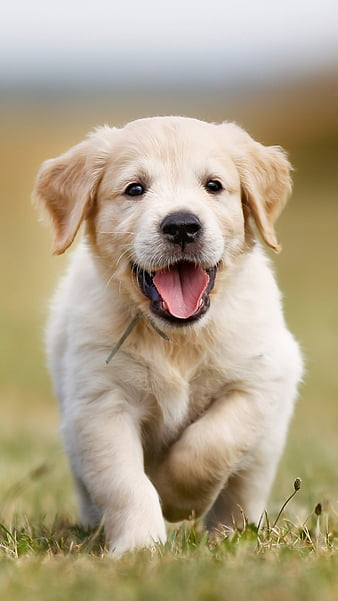

1/1 [==============================] - 1s 679ms/step
[[-5.288355  4.662632]]
1
The image represents a Dog


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


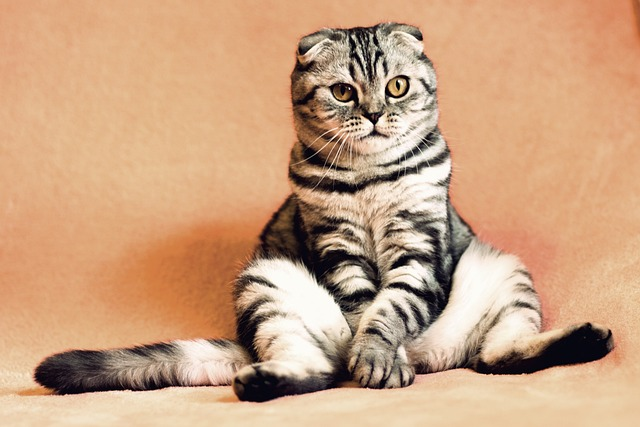

1/1 [==============================] - 0s 113ms/step
[[ 3.1555374 -2.3013384]]
0
The image represents a Cat


In [49]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')